###Matplotlib exercise


In [21]:
import matplotlib.pyplot as plt
import requests
import numpy as np


def downloadfile(url, fileName):
    req = requests.get(url, stream=True)
    with open(fileName, 'wb') as handler:
        for chunk in req.iter_content():
            handler.write(chunk)

fileNames = ['Crime_Data_from_2010_small.csv']
for name in fileNames:
  downloadfile("https://raw.githubusercontent.com/BartekGRK/Python_data_analysis/master/Gaussian_elimination/"+name, name)

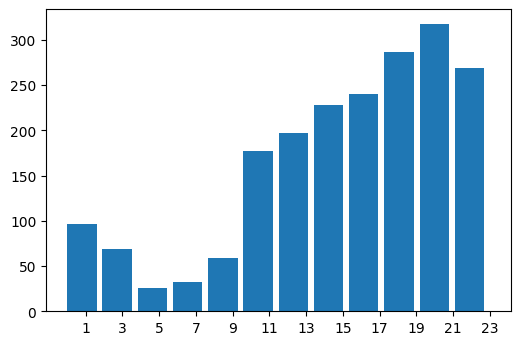

In [17]:
import csv
with open('Crime_Data_from_2010_small.csv') as f:
  reader = csv.reader(f, delimiter=',')
  firstrow = next(reader)
  hours = []
  for row in reader:
    hours.append(int(row[3][:2]))

plt.subplots(1,1, dpi=100)
plt.hist(hours, bins=12, width=1.6)
plt.xticks(np.arange(1,24,2));

Text(3, 160, 'The maximum value: 171')

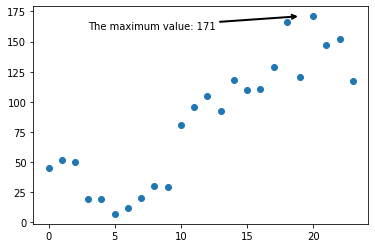

In [18]:
import collections
cnt = collections.Counter(hours)


max_val = cnt.get(max(cnt, key=cnt.get))

plt.scatter(cnt.keys(),cnt.values())

plt.annotate(f'The maximum value: {max_val}', xytext=(3,160),xy=(19, 171),
            arrowprops=dict(arrowstyle="->",lw=2))

### Implementation a Gaussian elimination algorithm with a function taking two arguments: A - the matrix, b - right hand side vector

In [19]:
def gaussian(A,b):
  Ag = np.concatenate([A, b[:,None]],axis = 1)
  for c in range(A.shape[1]-1):
    for r in range (c+1,A.shape[0]):
      Ag[r,:] -= Ag[c,:]* Ag[r,c]/Ag[c,c]
      
  return Ag

def back(U,c):

  x = np.zeros(c.shape)
  for i in np.arange(c.shape[0]-1,-1,-1):

    s = x[i+1:] @ U[i,i+1:]
    x[i]= (c[i] - s)/ U[i,i]
  return x


In [20]:

A = np.arange(1, 17, dtype=np.float64).reshape(4,4)
A[1,2] = 88
A[1,3] = -3
A[2,3] = -3
print(f'A = {A}')

x = np.ones(A.shape[0])
print(f'Original x = {x}')
b = A  @ x.T
print(f'Right hand side for testing: b = {b}')


Ae = gaussian(A, b)
print(f'Check if A was unchanged ')
print(f'Eliminated augmented matrix:\n {Ae}')
print(f'Eliminated augmented matrix A part: {Ae[:,:-1]}')
print(f'Eliminated augmented matrix b part: {Ae[:,Ae.shape[1]-1]}')

# Find solution
x = back(Ae[:,:-1],Ae[:,Ae.shape[1]-1])
print(f'Solution: {x}')

A = [[ 1.  2.  3.  4.]
 [ 5.  6. 88. -3.]
 [ 9. 10. 11. -3.]
 [13. 14. 15. 16.]]
Original x = [1. 1. 1. 1.]
Right hand side for testing: b = [10. 96. 27. 58.]
Check if A was unchanged 
Eliminated augmented matrix:
 [[   1.     2.     3.     4.    10. ]
 [   0.    -4.    73.   -23.    46. ]
 [   0.     0.  -162.     7.  -155. ]
 [   0.     0.     0.    22.5   22.5]]
Eliminated augmented matrix A part: [[   1.     2.     3.     4. ]
 [   0.    -4.    73.   -23. ]
 [   0.     0.  -162.     7. ]
 [   0.     0.     0.    22.5]]
Eliminated augmented matrix b part: [  10.    46.  -155.    22.5]
Solution: [1. 1. 1. 1.]
